In [1]:
from torch import nn
import matplotlib.pyplot as plt
from torchsummary import summary

import lightdde as dde
from essential import *
from qmodels import *

In [2]:
data = dde.data.PDEData(
    domain=domain,
    pde=pde,
    bcs=[boundary_condition_u, boundary_condition_v, boundary_condition_right_p],
    exact_solution=[u_func, v_func, p_func],
    num_domain=2601,
    num_bc=400,
    num_test=5000,
)

In [3]:
net = QuantumNet(in_dim=2, out_dim=3, activation=nn.ReLU)

model = dde.Model(
    data=data,
    model=net,
    save_path="models/quantum_2000e_relu/",
    log_every=20,
    save_every=10,
)

model.compile()

Loaded snapshot at epoch 2000


In [4]:
x = model.data.domain.uniform_points(100)
x.requires_grad_()
;

''

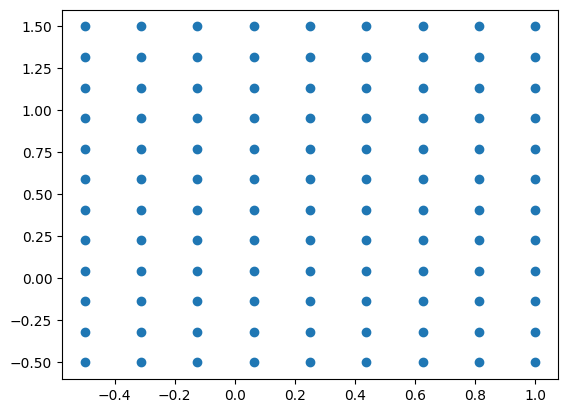

In [5]:
plt.scatter(x[:, 0].detach(), x[:, 1].detach())

In [6]:
u = model.forward(x)

Executed in 0.69 sec.


In [7]:
momentum_x, momentum_y, continuity = pde(x, u)

## nn gradients

In [8]:
u_vel, v_vel, p = u[:, 0:1], u[:, 1:2], u[:, 2:]

u_vel_x = dde.grad.jacobian(u, x, i=0, j=0)
u_vel_y = dde.grad.jacobian(u, x, i=0, j=1)
u_vel_xx = dde.grad.hessian(u, x, component=0, i=0, j=0)
u_vel_yy = dde.grad.hessian(u, x, component=0, i=1, j=1)

v_vel_x = dde.grad.jacobian(u, x, i=1, j=0)
v_vel_y = dde.grad.jacobian(u, x, i=1, j=1)
v_vel_xx = dde.grad.hessian(u, x, component=1, i=0, j=0)
v_vel_yy = dde.grad.hessian(u, x, component=1, i=1, j=1)

p_x = dde.grad.jacobian(u, x, i=2, j=0)
p_y = dde.grad.jacobian(u, x, i=2, j=1)

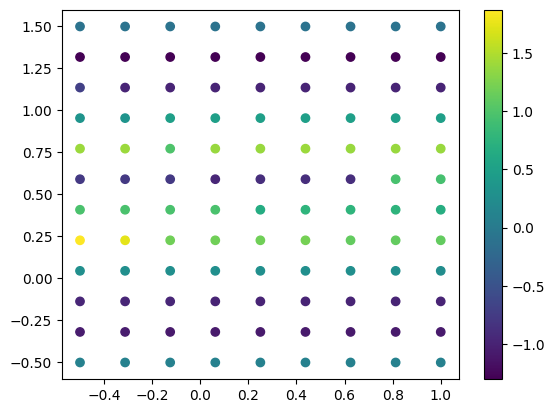

In [9]:
plt.scatter(x[:, 0].detach(), x[:, 1].detach(), c=u_vel_yy.detach())
plt.colorbar()
plt.show()

In [15]:
u_vel_x.max(), u_vel_xx.max(), u_vel_y.max(), u_vel_yy.max()

(tensor(0.0543, grad_fn=<MaxBackward1>),
 tensor(0.0051, grad_fn=<MaxBackward1>),
 tensor(8.5764, grad_fn=<MaxBackward1>),
 tensor(1.8710, grad_fn=<MaxBackward1>))

# reference gradients

In [23]:
u_e = u_func(x)
v_e = v_func(x)
p_e = p_func(x)

u = torch.cat([u_e, v_e, p_e], dim=1)

In [24]:
momentum_x, momentum_y, continuity = pde(x, u)

In [25]:
momentum_x.abs().mean(), momentum_y.abs().mean(), continuity.abs().mean()

(tensor(1.7843e-07, grad_fn=<MeanBackward0>),
 tensor(2.8060e-08, grad_fn=<MeanBackward0>),
 tensor(5.0360e-08, grad_fn=<MeanBackward0>))

In [45]:
u_vel, v_vel, p = u[:, 0:1], u[:, 1:2], u[:, 2:]

u_vel_x = dde.grad.jacobian(u, x, i=0, j=0)
u_vel_y = dde.grad.jacobian(u, x, i=0, j=1)
u_vel_xx = dde.grad.hessian(u, x, component=0, i=0, j=0)
u_vel_yy = dde.grad.hessian(u, x, component=0, i=1, j=1)

v_vel_x = dde.grad.jacobian(u, x, i=1, j=0)
v_vel_y = dde.grad.jacobian(u, x, i=1, j=1)
v_vel_xx = dde.grad.hessian(u, x, component=1, i=0, j=0)
v_vel_yy = dde.grad.hessian(u, x, component=1, i=1, j=1)

p_x = dde.grad.jacobian(u, x, i=2, j=0)
p_y = dde.grad.jacobian(u, x, i=2, j=1)

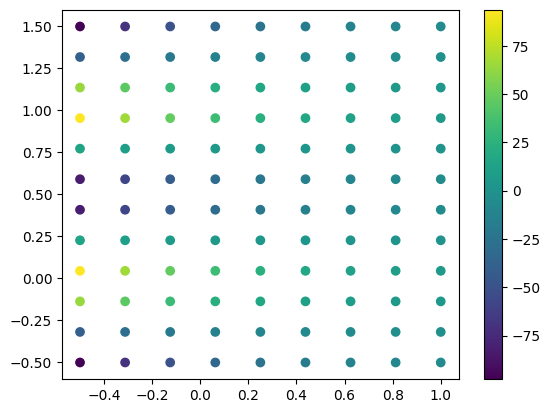

In [52]:
plt.scatter(x[:, 0].detach(), x[:, 1].detach(), c=u_vel_yy.detach())
plt.colorbar()
plt.show()

In [53]:
u_vel_x.max(), u_vel_xx.max(), u_vel_y.max(), u_vel_yy.max()

(tensor(4.2934, grad_fn=<MaxBackward1>),
 tensor(8.0996, grad_fn=<MaxBackward1>),
 tensor(15.3743, grad_fn=<MaxBackward1>),
 tensor(93.6396, grad_fn=<MaxBackward1>))

## fnn gradients

In [26]:
net = FNN()

model_fnn = dde.Model(
    data=data,
    model=net,
    save_path="models/FNN_1000e_tanh/",
    log_every=100,
    save_every=100,
)

model_fnn.compile()

Loaded snapshot at epoch 1000


''

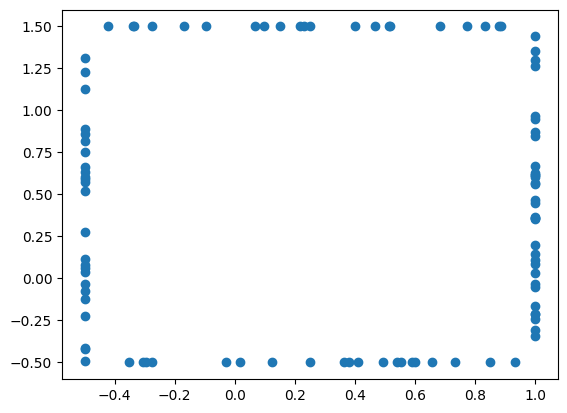

In [36]:
x_bc = model.data.domain.random_boundary_points(100)
plt.scatter(x_bc[:, 0], x_bc[:, 1])
;

In [28]:
momentum_x, momentum_y, continuity = pde(x, u_fnn)

In [29]:
momentum_x.abs().mean(), momentum_y.abs().mean(), continuity.abs().mean()

(tensor(0.1099, grad_fn=<MeanBackward0>),
 tensor(0.0524, grad_fn=<MeanBackward0>),
 tensor(0.0413, grad_fn=<MeanBackward0>))

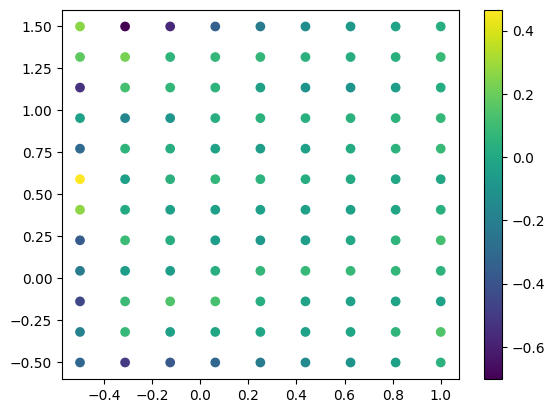

In [14]:
plt.scatter(x[:, 0].detach(), x[:, 1].detach(), c=momentum_x.detach())
plt.colorbar()
plt.show()

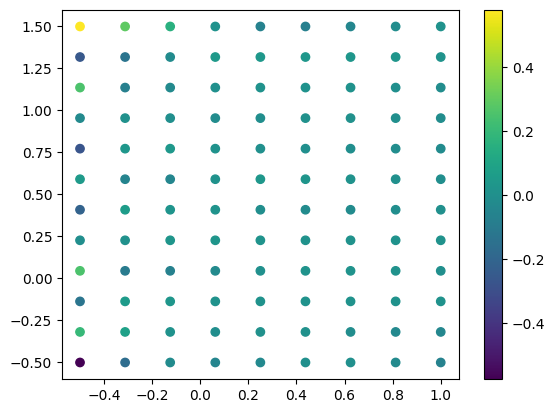

In [15]:
plt.scatter(x[:, 0].detach(), x[:, 1].detach(), c=momentum_y.detach())
plt.colorbar()
plt.show()

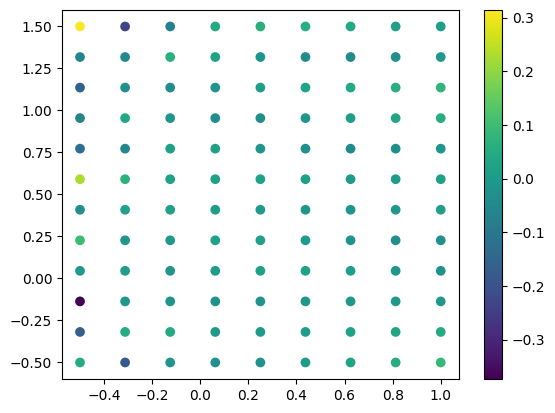

In [16]:
plt.scatter(x[:, 0].detach(), x[:, 1].detach(), c=continuity.detach())
plt.colorbar()
plt.show()

In [18]:
u_vel, v_vel, p = u_fnn[:, 0:1], u_fnn[:, 1:2], u_fnn[:, 2:]

u_vel_x = dde.grad.jacobian(u_fnn, x, i=0, j=0)
u_vel_y = dde.grad.jacobian(u_fnn, x, i=0, j=1)
u_vel_xx = dde.grad.hessian(u_fnn, x, component=0, i=0, j=0)
u_vel_yy = dde.grad.hessian(u_fnn, x, component=0, i=1, j=1)

v_vel_x = dde.grad.jacobian(u_fnn, x, i=1, j=0)
v_vel_y = dde.grad.jacobian(u_fnn, x, i=1, j=1)
v_vel_xx = dde.grad.hessian(u_fnn, x, component=1, i=0, j=0)
v_vel_yy = dde.grad.hessian(u_fnn, x, component=1, i=1, j=1)

p_x = dde.grad.jacobian(u_fnn, x, i=2, j=0)
p_y = dde.grad.jacobian(u_fnn, x, i=2, j=1)

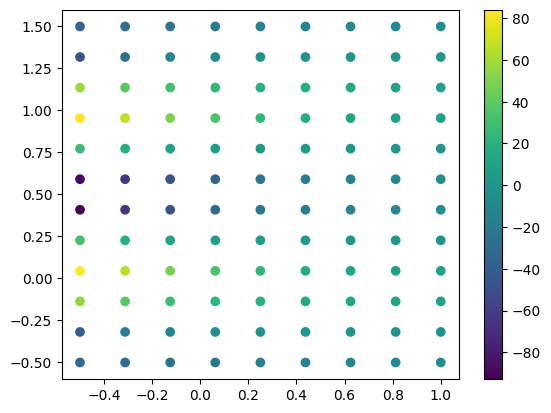

In [19]:
plt.scatter(x[:, 0].detach(), x[:, 1].detach(), c=u_vel_yy.detach())
plt.colorbar()
plt.show()

In [20]:
u_vel_x.max(), u_vel_xx.max(), u_vel_y.max(), u_vel_yy.max()

(tensor(3.1071, grad_fn=<MaxBackward1>),
 tensor(3.2430, grad_fn=<MaxBackward1>),
 tensor(15.1815, grad_fn=<MaxBackward1>),
 tensor(84.0340, grad_fn=<MaxBackward1>))

## fnn losses

In [3]:
net = FNN()

model_fnn = dde.Model(
    data=data,
    model=net,
    save_path="models/FNN_1000e_tanh/",
    log_every=100,
    save_every=100,
)

model_fnn.compile()

Loaded snapshot at epoch 1000


In [4]:
x_pde = model_fnn.data.domain.random_points(2601).requires_grad_()
x_bc = model_fnn.data.domain.random_boundary_points(400)
pred_pde = model_fnn.forward(x_pde)
pred_bc = model_fnn.predict(x_bc)

Executed in 0.03 sec.
Executed in 0.00 sec.


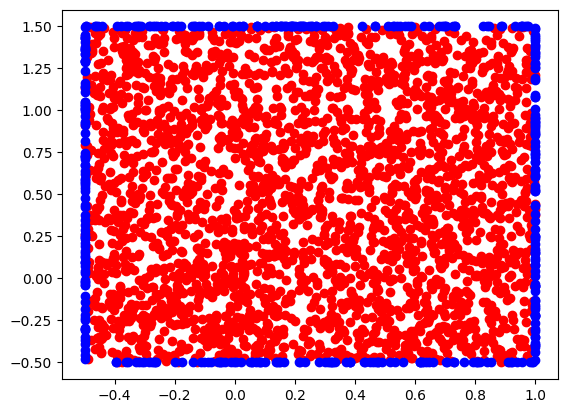

In [5]:
plt.scatter(x_pde[:, 0].detach(), x_pde[:, 1].detach(), c="red")
plt.scatter(x_bc[:, 0].detach(), x_bc[:, 1].detach(), c="blue")

In [6]:
model_fnn.data.loss(x_pde, x_bc, pred_pde, pred_bc)

loss_pde: [tensor(0.0076, grad_fn=<MseLossBackward0>), tensor(0.0024, grad_fn=<MseLossBackward0>), tensor(0.0019, grad_fn=<MseLossBackward0>)]
loss_bc: [tensor(0.0092), tensor(0.0059), tensor(0.0001)]


tensor(0.0271, grad_fn=<AddBackward0>)